In [1]:
%pylab inline
from astropy.time import Time
import datetime
import matplotlib.pylab as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


# Data extraction and processing
https://bitbucket.org/r_et_d/cxouj110926/src/master/scripts/extract_CXOUJ110926.py
https://bitbucket.org/r_et_d/cxouj110926/src/master/scripts/show_CXOUJ110926.py

In [2]:
def readcsv(filename):

    # read input file
    with open(filename, 'r') as fin:
        headings = fin.readline()
        data = fin.readlines()

    # read input file assuming format: TS, XX, XY, YX, YY
    XX = []
    YY = []
    TS = []
    for cnt, line in enumerate(data):
        line_data = line.strip().split(',')
        TS.append(float(line_data[0]))
        [xx, _, _, yy] = np.array(line_data[1:]).astype(float)
        XX.append(float(line_data[1]))
        YY.append(float(line_data[4]))

    ts = np.array(TS)
    xx = np.array(XX)
    yy = np.array(YY)
    return ts, xx, yy

In [3]:
[ts_1560526258,
 xx_1560526258,
 yy_1560526258] = readcsv('CXOUJ110926_1560526258_xcorr_split.csv')
dt_1560526258 = Time(ts_1560526258, format='unix').datetime
stokesI_1560526258 = np.array(xx_1560526258 + yy_1560526258)

[ts_1560609072,
 xx_1560609072,
 yy_1560609072] = readcsv('CXOUJ110926_1560609072_xcorr_split.csv')
dt_1560609072 = Time(ts_1560609072, format='unix').datetime
stokesI_1560609072 = np.array(xx_1560609072 + yy_1560609072)

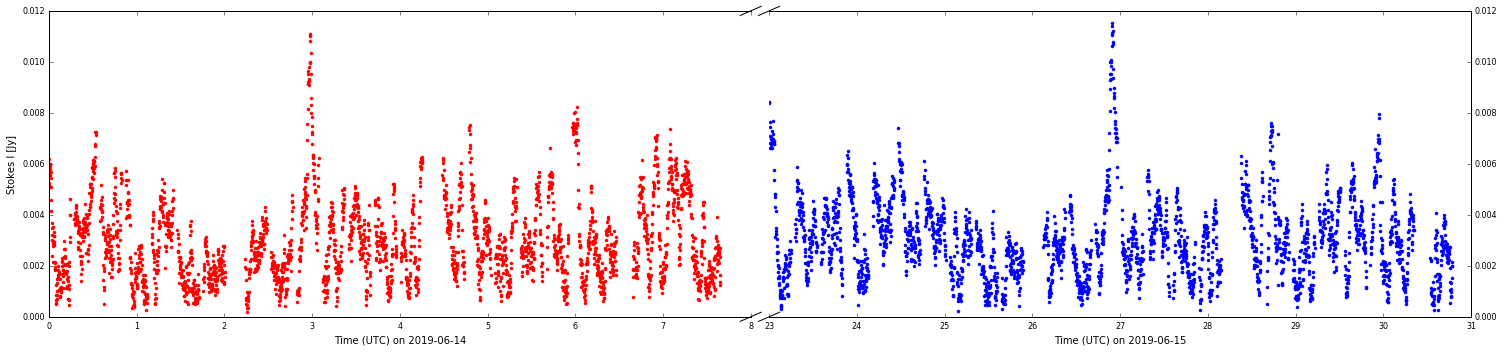

In [4]:
ts0 = ts_1560526258[0]
fig_, (ax0,ax1) = plt.subplots(1, 2,
                         sharey=True,
                         figsize=[21, 5],
                         facecolor='white',
                         squeeze=True)
plt.subplots_adjust(wspace=0.1, hspace=0)
ax0.plot((ts_1560526258-ts0)/3600., stokesI_1560526258, 'r.')
ax1.plot((ts_1560609072-ts0)/3600., stokesI_1560609072, 'b.')

d = .015 # how big to make the diagonal lines in axes coordinates
# hide the spines between axes
ax0.spines['right'].set_visible(False)
ax0.yaxis.tick_left()
ax0.tick_params(labelright='off')
ax1.spines['left'].set_visible(False)
ax1.yaxis.tick_right()

# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax0.transAxes, color='k', clip_on=False)
ax0.plot((1-d,1+d), (-d,+d), **kwargs)
ax0.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax1.transAxes)  # switch to the bottom axes
ax1.plot((-d,+d), (1-d,1+d), **kwargs)
ax1.plot((-d,+d), (-d,+d), **kwargs)

# axis labels
ax0.tick_params(axis='x', labelsize=8)
ax0.set_xlabel("Time (UTC) on {}".format(
        dt_1560526258[0].strftime("%Y-%m-%d")),
               fontsize=10)
ax0.tick_params(axis='y', labelsize=8)
ax0.set_ylabel('Stokes I [Jy]', fontsize=10)

ax1.tick_params(axis='x', labelsize=8)
ax1.set_xlabel("Time (UTC) on {}".format(
        dt_1560609072[0].strftime("%Y-%m-%d")),
               fontsize=10)
ax1.tick_params(axis='y', labelsize=8)

fig_.tight_layout()

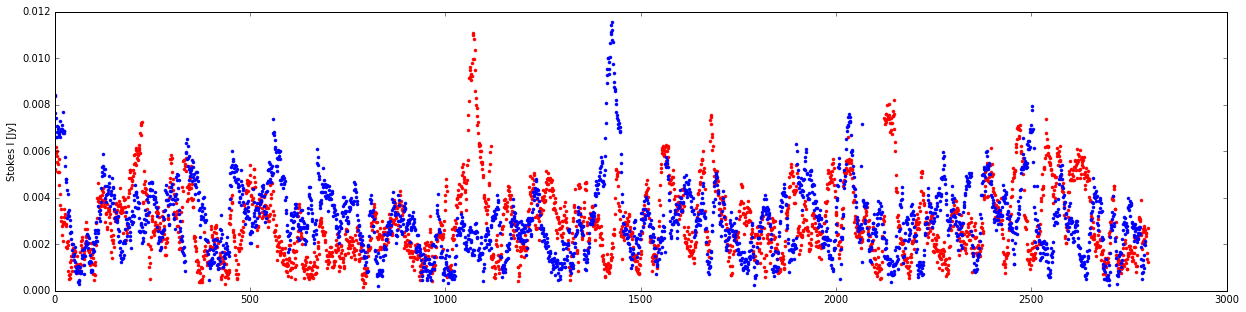

In [5]:
fig_, ax_ = plt.subplots(figsize=[21, 5],facecolor='white')
ax_.plot(stokesI_1560526258, 'r.')
ax_.plot(stokesI_1560609072, 'b.')
ax_.set_ylabel('Stokes I [Jy]', fontsize=10)

## Align observation times

In [6]:
def silly_upsample(ts_data, xx_data, yy_data):
    ts_ = []
    xx_ = []
    yy_ = []
    for idx, ts in enumerate(ts_data):

        ts1 = ts_data[idx+1]    
        xx0 = xx_data[idx]
        xx1 = xx_data[idx+1]
        yy0 = yy_data[idx]
        yy1 = yy_data[idx+1]
        ts_.append(ts)
        xx_.append(xx0)
        yy_.append(yy0)

        xx_m = (xx1 - xx0) / (ts1 - ts)
        xx_c = xx0 - xx_m*ts    
        yy_m = (yy1 - yy0) / (ts1 - ts)
        yy_c = yy0 - yy_m*ts

        for sec in np.arange(1, 8, 1e-3):
            ts_.append(ts+sec)
            xx_.append(xx_m*(ts+sec)+xx_c)
            yy_.append(yy_m*(ts+sec)+yy_c)

        if idx >= len(ts_data)-2: break

    ts_.append(ts_data[-1])
    xx_.append(xx_data[-1])
    yy_.append(yy_data[-1])
    
    return [np.array(ts_), np.array(xx_), np.array(yy_)]

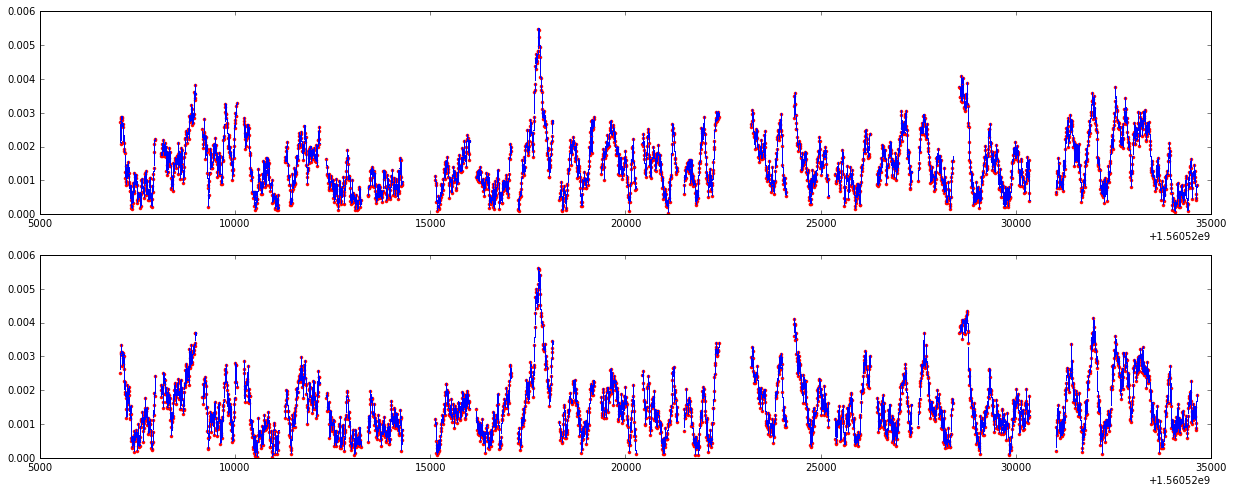

In [7]:
[ts_new_1560526258,
 xx_new_1560526258,
 yy_new_1560526258] = silly_upsample(ts_1560526258,
                                     xx_1560526258,
                                     yy_1560526258)
fig_, (ax0,ax1) = plt.subplots(2, 1,
                               figsize=[21, 8],
                               facecolor='white')
ax0.plot(ts_1560526258, xx_1560526258, 'r.',
         ts_new_1560526258, xx_new_1560526258, 'b,')
ax1.plot(ts_1560526258, yy_1560526258, 'r.',
         ts_new_1560526258, yy_new_1560526258, 'b,')

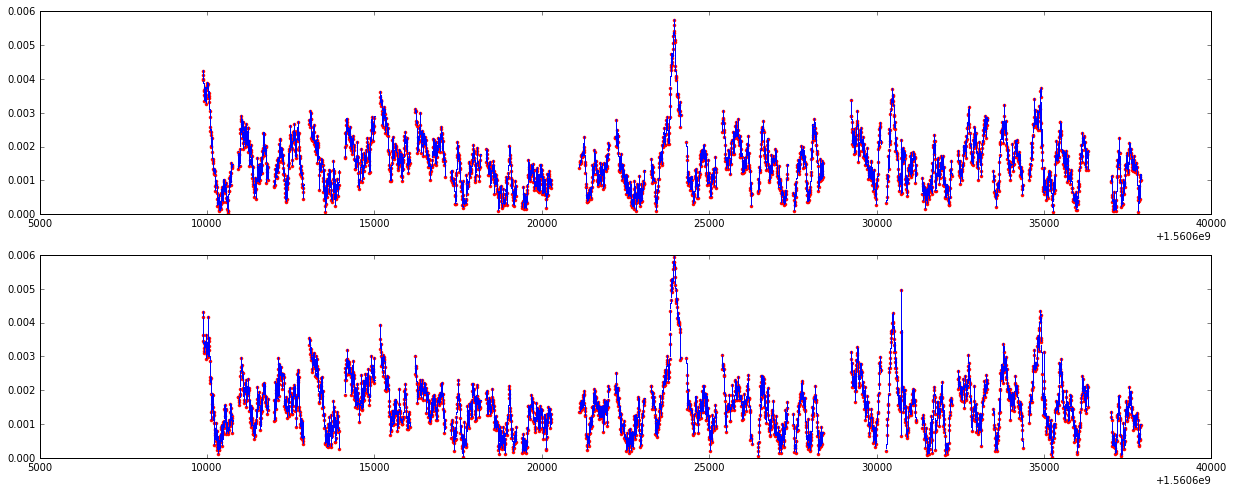

In [8]:
[ts_new_1560609072,
 xx_new_1560609072,
 yy_new_1560609072] = silly_upsample(ts_1560609072,
                                     xx_1560609072,
                                     yy_1560609072)
fig_, (ax0,ax1) = plt.subplots(2, 1,
                               figsize=[21, 8],
                               facecolor='white')
ax0.plot(ts_1560609072, xx_1560609072, 'r.',
         ts_new_1560609072, xx_new_1560609072, 'b,')
ax1.plot(ts_1560609072, yy_1560609072, 'r.',
         ts_new_1560609072, yy_new_1560609072, 'b,')

In [9]:
stokesI_new_1560526258 = np.array(xx_new_1560526258 + yy_new_1560526258)
stokesI_new_1560609072 = np.array(xx_new_1560609072 + yy_new_1560609072)

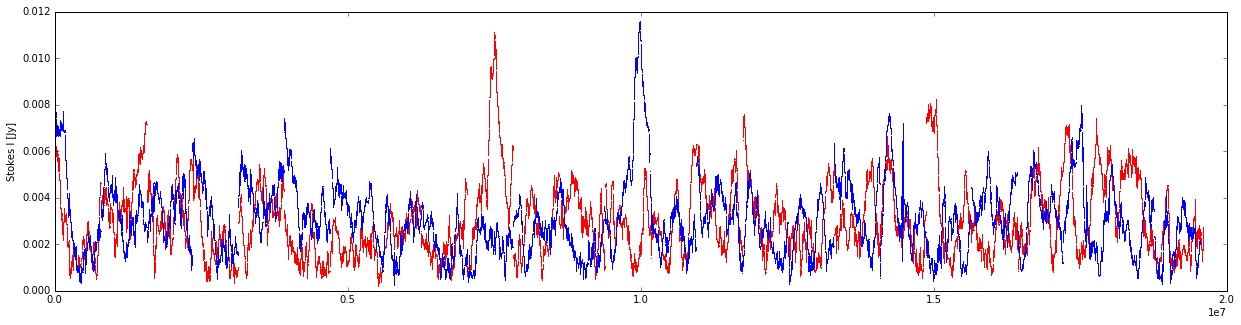

In [10]:
fig_, ax_ = plt.subplots(figsize=[21, 5],facecolor='white')
ax_.plot(stokesI_new_1560526258, 'r,')
ax_.plot(stokesI_new_1560609072, 'b,')
ax_.set_ylabel('Stokes I [Jy]', fontsize=10)

In [11]:
dt_1560526258 = Time(ts_new_1560526258, format='unix').datetime
midnight1560526258 = datetime.datetime.combine(dt_1560526258[0].date(),
                                               datetime.time.min)
print('midnight of first observation set: {}'.format(midnight1560526258))
deltat_1560526258 = dt_1560526258 - midnight1560526258
print('observation starts: {}'.format(deltat_1560526258[0]))
print('observation ends: {}'.format(deltat_1560526258[-1]))

dt_1560609072 = Time(ts_new_1560609072, format='unix').datetime
midnight1560609072 = datetime.datetime.combine(dt_1560609072[0].date(),
                                               datetime.time.min)
print('midnight of first observation set: {}'.format(midnight1560609072))
deltat_1560609072 = dt_1560609072 - midnight1560609072
print('observation starts: {}'.format(deltat_1560609072[0]))
print('observation ends: {}'.format(deltat_1560609072[-1]))

midnight of first observation set: 2019-06-14 00:00:00
observation starts: 15:44:24.390000
observation ends: 23:23:40.740000
midnight of first observation set: 2019-06-15 00:00:00
observation starts: 14:44:29.990000
observation ends: 22:31:30.140000


In [12]:
seconds_1560526258 = np.array([dt_td.total_seconds()
                               for dt_td in deltat_1560526258])
seconds_1560609072 = np.array([dt_td.total_seconds()
                               for dt_td in deltat_1560609072])

In [13]:
start_idx = np.argmin(np.abs(deltat_1560609072-deltat_1560526258[0]))
print(deltat_1560609072[start_idx], deltat_1560526258[0])
end_idx = np.argmin(np.abs(deltat_1560526258-deltat_1560609072[-1]))
print(deltat_1560609072[-1], deltat_1560526258[end_idx])

15:44:24.390000 15:44:24.390000
22:31:30.140000 22:31:30.140000


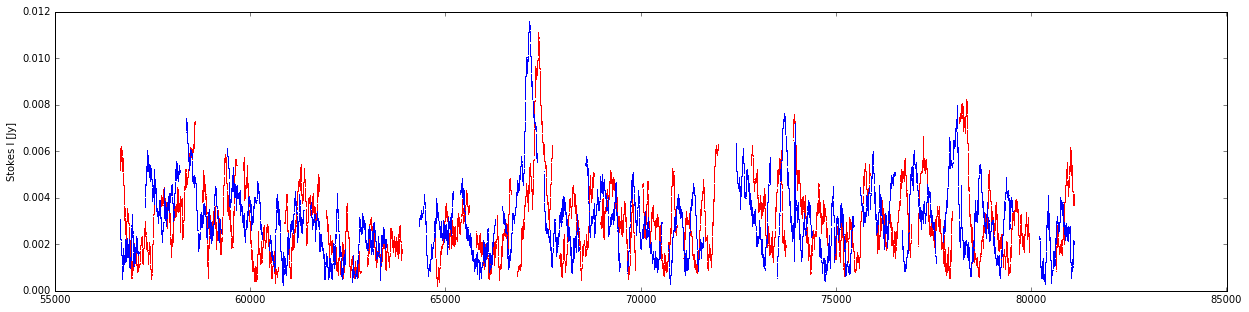

In [14]:
fig_, ax_ = plt.subplots(figsize=[21, 5],
                         facecolor='white')
ax_.plot(seconds_1560526258[:end_idx],
         stokesI_new_1560526258[:end_idx],
         'r,')
ax_.plot(seconds_1560609072[start_idx:],
         stokesI_new_1560609072[start_idx:],
         'b,')
ax_.set_ylabel('Stokes I [Jy]', fontsize=10)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  """


(56664.389999999999,
 81090.139999999999,
 0.00017041380000000001,
 0.011543803799999999)

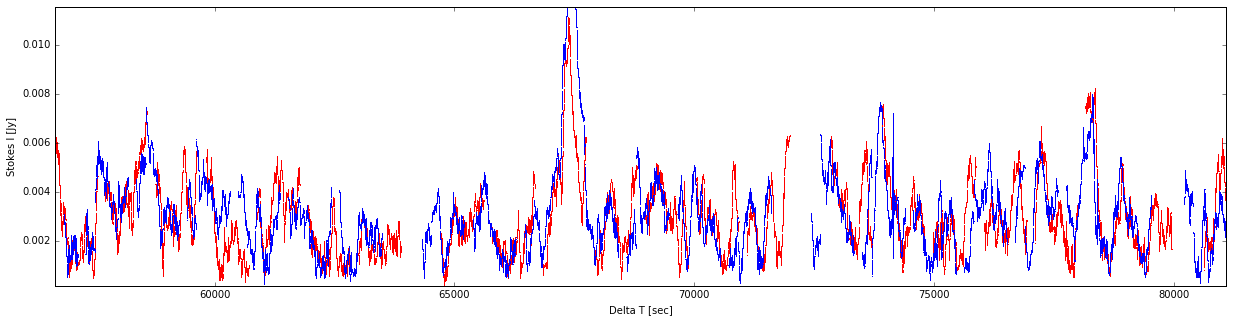

In [15]:
fig_, ax_ = plt.subplots(figsize=[21, 5],facecolor='white')
ax_.plot(seconds_1560526258[:end_idx],
         stokesI_new_1560526258[:end_idx],
         'r,')
num=175*1e3
ax_.plot(seconds_1560609072[start_idx+num:],
         stokesI_new_1560609072[start_idx:-num],
         'b,')
ax_.set_ylabel('Stokes I [Jy]', fontsize=10)
ax_.set_xlabel('Delta T [sec]', fontsize=10)
plt.axis('tight')